In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.fft as npf
import matplotlib
import matplotlib.pyplot as plt
import time
import imagetools.projectA as im
import imagetools.provided as im1
%matplotlib notebook

I) Question 4:

<IPython.core.display.Javascript object>


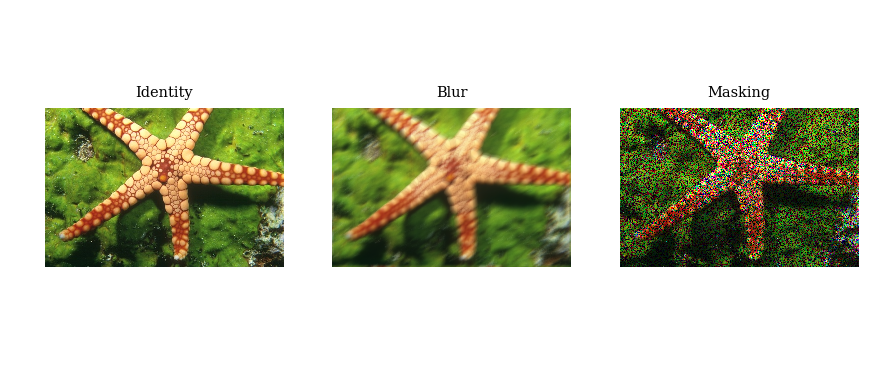

In [10]:
%matplotlib notebook
x=plt.imread('assets/starfish.png')
shape= x.shape
nu=im.kernel('motion')
H_r = im.RandomMasking(shape, 0.4)
H_b = im.Convolution(shape, nu, separable=None)
y= H_b(x)
z= H_r(x)
fig, axes = plt.subplots(ncols=3, figsize=(7,3))
im1.show(x, ax=axes[0])
axes[0].set_title('Identity')
im1.show(y, ax=axes[1])
axes[1].set_title('Blur')
im1.show(z, ax=axes[2])
axes[2].set_title('Masking')
fig.show()

I) Question 5:

For the Identity operator:

In [102]:
H_i=im.Identity((24,16))
x= np.random.rand(H_i.ishape[0], H_i.ishape[1])
y= np.random.rand(H_i.oshape[0], H_i.oshape[1])
LHS= (H_i(x)*y).sum()
RHS= (H_i.adjoint(y)*x).sum()
np.isclose(LHS, RHS)

True

For the Convolution operator:

In [98]:
nu=im.kernel('motion')
H_c=im.Convolution((24,16), nu)
x= np.random.rand(H_c.ishape[0], H_c.ishape[1])
y= np.random.rand(H_c.oshape[0], H_c.oshape[1])
LHS= (H_c(x)*y).sum()
RHS= (H_c.adjoint(y)*x).sum()
np.isclose(LHS, RHS)

True

For the Random masking operator:

In [67]:
H_r=im.RandomMasking((24,16,3), 0.4)
x= np.random.rand(H_r.ishape[0], H_r.ishape[1], H_r.ishape[2])
y= np.random.rand(H_r.oshape[0], H_r.oshape[1], H_r.oshape[2])
LHS= (H_r(x)*y).sum()
RHS= (H_r.adjoint(y)*x).sum()
np.isclose(LHS, RHS)

True

In [97]:
H_r=im.RandomMasking((24,16), 0.4)
x= np.random.rand(H_r.ishape[0], H_r.ishape[1], H_r.shape[2])
y= np.random.rand(H_r.oshape[0], H_r.oshape[1], H_r.shape[2])
LHS= (H_r(x)*y).sum()
RHS= (H_r.adjoint(y)*x).sum()
np.isclose(LHS, RHS)

True

I) Question 6:

For the Identity operator:

In [4]:
tau=1
H_i=im.Identity((24,16))
x= np.random.rand(H_i.ishape[0], H_i.ishape[1])
LHS= H_i.gram_resolvent(x+tau*H_i.gram(x), tau)
np.allclose(LHS, x)

True

For the Convolution operator:

In [80]:
tau=1
nu=im.kernel('motion')
H_c=im.Convolution((24,16), nu)
x= np.random.rand(H_c.ishape[0], H_c.ishape[1])
LHS= H_c.gram_resolvent(x+tau*H_c.gram(x), tau)
np.allclose(LHS, x, atol=1e-2)

True

For the Random Masking operator:

In [74]:
tau=1
H_r=im.RandomMasking((24,16,3), 0.4)
x= np.random.rand(H_r.ishape[0], H_r.ishape[1], H_r.ishape[2])
LHS= H_r.gram_resolvent(x+tau*H_r.gram(x), tau)
np.allclose(LHS, x)

True

II) Question 8:

<IPython.core.display.Javascript object>


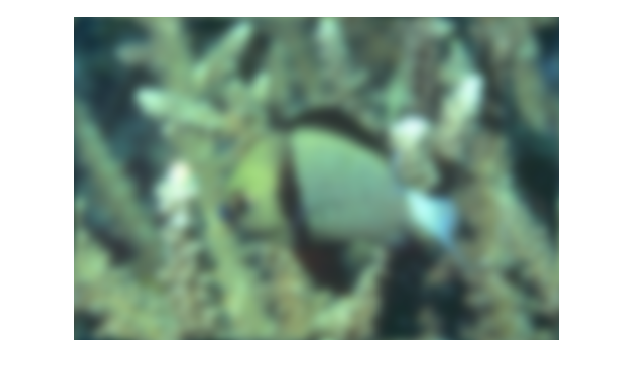

In [143]:
x0=plt.imread('assets/fish.png')
sig = 10/255
y = x0 + sig * np.random.randn(x0.shape[0], x0.shape[1], x0.shape[2])
x=im.heat_diffusion(y, 100, 1/8)
im1.show(x)

II) Question 9:

For the explicit case:

<IPython.core.display.Javascript object>


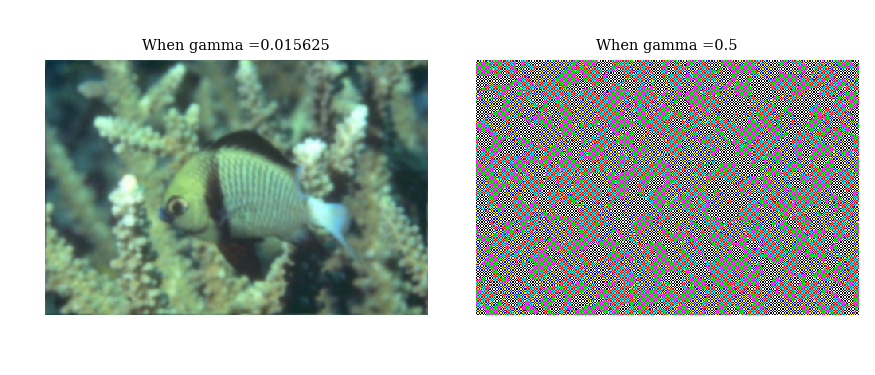

In [139]:
x=im.heat_diffusion(y, 100, 1/64, scheme='explicit')
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im1.show(x, ax=axes[0])
axes[0].set_title('When gamma =' + str(1/64))
x=im.heat_diffusion(y, 100, 1/2, scheme='explicit')
im1.show(x, ax=axes[1])
axes[1].set_title('When gamma =' + str(1/2))
fig.show()

For the implicit case:

<IPython.core.display.Javascript object>


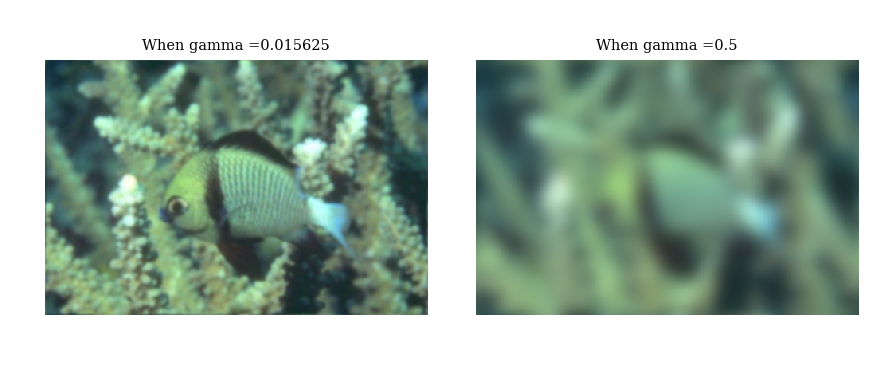

In [130]:
x=im.heat_diffusion(y, 100, 1/64, scheme='implicit')
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im1.show(x, ax=axes[0])
axes[0].set_title('When gamma =' + str(1/64))
x=im.heat_diffusion(y, 100, 1/2, scheme='implicit')
im1.show(x, ax=axes[1])
axes[1].set_title('When gamma =' + str(1/2))
fig.show()

For the continuous case:

<IPython.core.display.Javascript object>


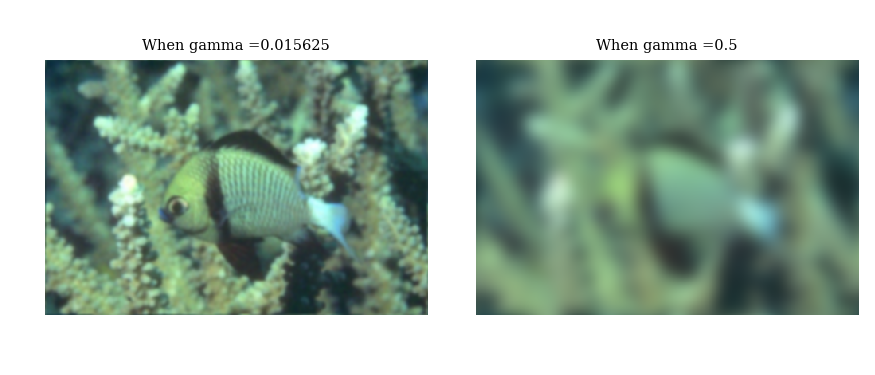

In [142]:
x=im.heat_diffusion(y, 100, 1/64, scheme='continuous')
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
im1.show(x, ax=axes[0])
axes[0].set_title('When gamma =' + str(1/64))
x=im.heat_diffusion(y, 100, 1/2, scheme='continuous')
im1.show(x, ax=axes[1])
axes[1].set_title('When gamma =' + str(1/2))
fig.show()

II) Question 13:

<IPython.core.display.Javascript object>


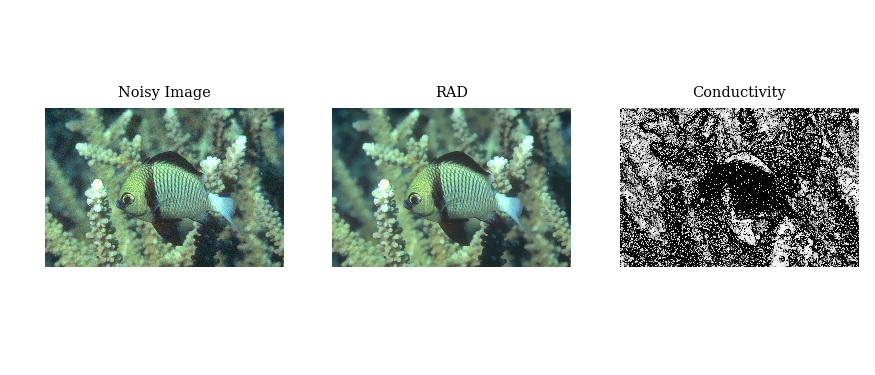

In [24]:
x0=plt.imread('assets/fish.png')
sig = 10/255
y = x0 + sig * np.random.randn(x0.shape[0], x0.shape[1],x0.shape[2])
x, alpha=im.anisotropic_diffusion(y, 100, 1/8, g=None, return_conductivity=True)
fig, axes = plt.subplots(ncols=3, figsize=(7,3))
im1.show(y, ax=axes[0])
axes[0].set_title('Noisy Image')
im1.show(x, ax=axes[1])
axes[1].set_title('RAD')
im1.show(alpha, ax=axes[2])
axes[2].set_title('Conductivity')
fig.show()